# #Try to form a loop in the python window(Jupyter or Pycharm for calculating the futures price for each contract traded on a particular date. And append the futures price calculated to the original file. Comment on each case whether the contract is underpriced, overpriced, or fairly priced, and justify. You should at least consider 3 contracts traded on a particular date. (Data for the same to be downloaded from the NSE website or web scrape as per your wish).


In [23]:
#importing libraries...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


niftyf = pd.read_csv(r"C:\Users\HP\Downloads\MW-FO-nse50_fut-04-Apr-2022.csv")
niftyf

,INSTRUMENT TYPE \n,SYMBOL \n,EXPIRY DATE \n,OPTION TYPE \n,STRIKE PRICE \n,LAST PRICE \n,CHNG \n,%CHNG \n,VOLUME \n(Contracts),VALUE,OPEN INTEREST \n,UNDERLYING VALUE \n
0,Index Futures,NIFTY,28-Apr-22,-,-,"17,737.95",193.50,1.10,192261,"1,69,22,10,18,543.00",238064,"17,670.45"
1,Index Futures,NIFTY,26-May-22,-,-,"17,765.00",193.95,1.10,31528,"27,80,73,96,484.00",44307,"17,670.45"
2,Index Futures,NIFTY,30-Jun-22,-,-,"17,800.00",149.65,0.85,4216,"3,72,59,70,104.00",2293,"17,670.45"


In [13]:
import math
# S = Spot price
# r =risk-free rate
# T= time to expiry
# q= Dividend
# c= cost of carry

def FuturePrice(S,c,T):
    return (S*(math.exp(c*T)));

S = 17737.95
T = 28/365;
r = 0.037;
q = 0.0
c=r-q
contractPrice_28april = FuturePrice(S,c,T)
print(contractPrice_28april)

17788.36813819421


In [14]:
def FuturePrice(S,c,T):
    return (S*(math.exp(c*T)));

S = 17765.00
T = 57/365;
r = 0.037;
q = 0.0
c=r-q
contractPrice_26may = FuturePrice(S,c,T)
print(contractPrice_26may)

17867.9447553545


In [15]:
def FuturePrice(S,c,T):
    return (S*(math.exp(c*T)));

S = 17800.00
T = 91/365;
r = 0.037;
q = 0.0
c=r-q
contractPrice_30june = FuturePrice(S,c,T)
print(contractPrice_30june)

17964.958577550886


In [35]:
df_x = pd.DataFrame(niftyf)
print(df_x)

  INSTRUMENT TYPE \n SYMBOL \n EXPIRY DATE \n OPTION TYPE \n STRIKE PRICE \n  \
0      Index Futures     NIFTY      28-Apr-22              -               -   
1      Index Futures     NIFTY      26-May-22              -               -   
2      Index Futures     NIFTY      30-Jun-22              -               -   

  LAST PRICE \n  CHNG \n  %CHNG \n  VOLUME \n(Contracts)  \
0     17,737.95   193.50      1.10                192261   
1     17,765.00   193.95      1.10                 31528   
2     17,800.00   149.65      0.85                  4216   

                 VALUE   OPEN INTEREST \n UNDERLYING VALUE \n  
0  1,69,22,10,18,543.00            238064           17,670.45  
1    27,80,73,96,484.00             44307           17,670.45  
2     3,72,59,70,104.00              2293           17,670.45  


In [37]:
fprice = {"EXPIRY DATE \n": ["28-Apr-22", "26-May-22" , "30-Jun-22"],
         "contract_price" : ["17788.36", "17867.94","17964.95"]}
df_y = pd.DataFrame(fprice)
print(df_y)

  EXPIRY DATE \n contract_price
0      28-Apr-22       17788.36
1      26-May-22       17867.94
2      30-Jun-22       17964.95


In [56]:
mergef = pd.merge(df_x ,df_y)
print(mergef)

  INSTRUMENT TYPE \n SYMBOL \n EXPIRY DATE \n OPTION TYPE \n STRIKE PRICE \n  \
0      Index Futures     NIFTY      28-Apr-22              -               -   
1      Index Futures     NIFTY      26-May-22              -               -   
2      Index Futures     NIFTY      30-Jun-22              -               -   

  LAST PRICE \n  CHNG \n  %CHNG \n  VOLUME \n(Contracts)  \
0     17,737.95   193.50      1.10                192261   
1     17,765.00   193.95      1.10                 31528   
2     17,800.00   149.65      0.85                  4216   

                 VALUE   OPEN INTEREST \n UNDERLYING VALUE \n contract_price  
0  1,69,22,10,18,543.00            238064           17,670.45       17788.36  
1    27,80,73,96,484.00             44307           17,670.45       17867.94  
2     3,72,59,70,104.00              2293           17,670.45       17964.95  


In [57]:
df = pd.DataFrame(mergef)
  
Date = list(df.iloc[:, 2])
Closing_price = list(df.iloc[:, 5])
Underlying_price = list(df.iloc[:, 11])
Contract_price = list(df.iloc[:,12])


print(Date)

print(Closing_price)

print(Underlying_price)

print(Contract_price)

['28-Apr-22', '26-May-22', '30-Jun-22']
['17,737.95', '17,765.00', '17,800.00']
['17,670.45', '17,670.45', '17,670.45']
['17788.36', '17867.94', '17964.95']


In [96]:
Closing_price = [17737.95, 17765.00, 17800.00]
Underlying_price= [17670.45, 17670.45, 17670.45]
Contract_price= [17788.36, 17867.94, 17964.95]
Date = ['28-Apr-22', '26-May-22', '30-Jun-22']


<Figure size 864x864 with 0 Axes>

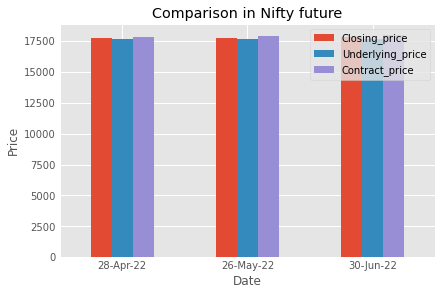

In [110]:

plt.figure(figsize=(12,12))

plt.style.use('ggplot')

df2 = pd.DataFrame({'Closing_price': Closing_price,
                   'Underlying_price': Underlying_price ,'Contract_price' :Contract_price }, index= Date )

ax = df2.plot.bar(rot=0)

plt.title("Comparison in Nifty future")
plt.ylabel("Price")
plt.xlabel('Date')
plt.show()